Дана выборка из 20 чисел: [2.28 3.36 3.2  2.83 2.52 3.08 2.69 3.27 2.25 2.   2.18 2.88 2.56 3.39 3.18 3.76 2.92 3.26 2.76 2.68]. Требуется проанализировать её: приблизить математическое ожидание и дисперсию, построить вариационный ряд и эмпирическую функцию распределения. Найти медиану.

Для начала, загрузим необходимые библиотеки

In [ ]:
import matplotlib.pyplot

После, обозначим саму выборку

In [ ]:
data = [2.28, 3.36, 3.2, 2.83, 2.52, 3.08, 2.69, 3.27, 2.25, 2, 2.18, 2.88, 2.56, 3.39, 3.18, 3.76, 2.92, 3.26, 2.76, 2.68]

Первым шагом обработки данных станет построение вариационного ряда. Напомним определение

Пусть имеется выборка $X = (X_1, X_2, \dots, X_n)$. Если элементы выборки упорядочить по возрастанию, то новый набор случайных величин, удовлетворяющий неравенствам: $X_{(1)} \le X_{(2)} \le \dots \le X_{(n)}$, называется <u>вариационным рядом</u>.
>$X_{(1)} = min(X_1, X_2, \dots, X_n), X_{(n)} = max(X_1, X_2, \dots, X_n )$

В соответствии с данным определением, используем к данным встроенную функцию sort()

In [ ]:
data.sort()
print(data)

[2, 2.18, 2.25, 2.28, 2.52, 2.56, 2.68, 2.69, 2.76, 2.83, 2.88, 2.92, 3.08, 3.18, 3.2, 3.26, 3.27, 3.36, 3.39, 3.76]


Первым приближением для данного ряда станет выборочное среднее - которое приближает математическое ожидание. Формула выборочного среднего: $$
\overline X = \frac{X_1+X_2+\dots+X_n}{n} = \frac{1}{n} \sum_{i=1}^n X_i
$$

In [ ]:
sample_mean = 0
for i in range (len(data)):
  sample_mean += data[i]
sample_mean = sample_mean / len(data)
print(f"Выборочное среднее = {sample_mean}")

Выборочное среднее = 2.8525


Следующим приближением станет приближение дисперсии. Для дисперсии существуют два приближения: а) Смещенная выборочная дисперсия: $$
S^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \overline X)^2
$$ б) Несмещенная выборочная дисперсия: $$
S_0^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline X)^2
$$

In [ ]:
unbiased_sample_variance, biased_sample_variance = 0, 0
for i in range (len(data)):
  unbiased_sample_variance = unbiased_sample_variance + ((data[i] - sample_mean)**2)
  biased_sample_variance = biased_sample_variance + ((data[i] - sample_mean)**2)
unbiased_sample_variance = unbiased_sample_variance / (len(data)-1)
biased_sample_variance = biased_sample_variance / (len(data))
print(f"Несмещенная выборочная дисперсия = {unbiased_sample_variance}\nСмещённая выборочная дисперсия = {biased_sample_variance}")

Несмещенная выборочная дисперсия = 0.21718815789473683
Смещённая выборочная дисперсия = 0.20632875


Далее, так как мы уже имеем вариационный ряд, мы можем найти медиану данного ряда. Для её нахождения воспользуемся тем фактом, что мы имеем чётное n, тогда формула будет иметь вид: $$med(X) = \frac{X_{[n/2]} + X_{[n/2]+1}}{2}$$

In [ ]:
median = (data[len(data)//2 - 1] + data[len(data)//2]) / 2
print(f"Медиана = {median}")

Медиана = 2.855


Далее, построим гистограмму для данного ряда данных. Так как мы имеем n = 20, то для построения гистограммы будем использовать $\sqrt(n) = \sqrt(20) \approx  4$ интервала.

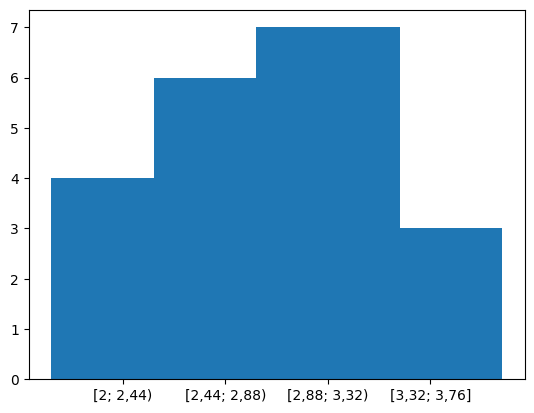

In [ ]:
delta = (data[len(data)-1] - data[0]) / 4
intervals = [data[0]]
start_value = data[0]
for i in range (4):
  start_value = start_value + delta
  intervals.append(start_value)
counter = [0, 0, 0, 0]
for i in range (len(data)):
  if 2 <= data[i] < 2.44:
    counter[0] += 1
  elif 2.44 <= data[i] < 2.88:
    counter[1] += 1
  elif 2.88 <= data[i] < 3.32:
    counter[2] += 1
  elif 3.32 <= data[i] <= 3.76:
    counter[3] += 1
intervals_for_hist = [0,5,10,15]
bar_width = 7
matplotlib.pyplot.xticks(intervals_for_hist, ["[2; 2,44)", "[2,44; 2,88)", "[2,88; 3,32)", "[3,32; 3,76]"])
matplotlib.pyplot.bar(intervals_for_hist, counter, bar_width)
matplotlib.pyplot.show()

Далее, нам необходимо построить эмпирическую функцию распределения случайной величины - график.

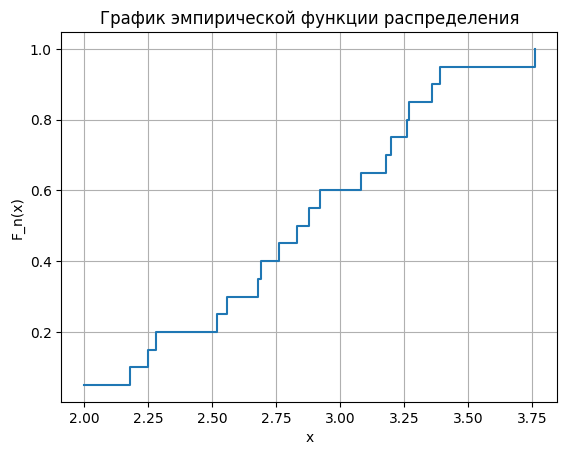

In [ ]:
y_values = [(i + 1) / len(data) for i in range(len(data))]
matplotlib.pyplot.step(data, y_values, where="post")
matplotlib.pyplot.xlabel("x")
matplotlib.pyplot.ylabel("F_n(x)")
matplotlib.pyplot.title("График эмпирической функции распределения")
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

**Окончательные результаты**

In [ ]:
print(f"Приближенное значение математического ожидания - выборочное среднее: {sample_mean}\nПриближенное значение дисперсии - несмещенная выборочная дисперсия = {unbiased_sample_variance}, смещённая выборочная дисперсия = {biased_sample_variance}\nВариационный ряд: {data}\nМедиана = {median}")

Приближенное значение математического ожидания - выборочное среднее: 2.8525
Приближенное значение дисперсии - несмещенная выборочная дисперсия = 0.21718815789473683, смещённая выборочная дисперсия = 0.20632875
Вариационный ряд: [2, 2.18, 2.25, 2.28, 2.52, 2.56, 2.68, 2.69, 2.76, 2.83, 2.88, 2.92, 3.08, 3.18, 3.2, 3.26, 3.27, 3.36, 3.39, 3.76]
Медиана = 2.855
